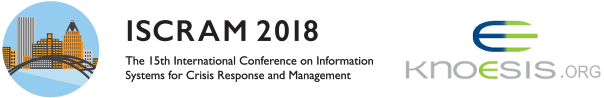

------

<center><h1>Location Extraction and Georeferencing in Social Media</h1></center>
<center><h3>Challenges, Techniques, and Applications</h3></center>

------

------

### Dataset we will be using:

#### 2017 The 3rd Workshop on Noisy User-generated Text (W-NUT): Emerging and Rare Entities task: http://noisy-text.github.io/2017/

In [1]:
# Data sources
WNUT17_dev = "https://raw.githubusercontent.com/halolimat/NER-WNUT17/master/data/emerging.dev.conll"
WNUT17_train = "https://raw.githubusercontent.com/halolimat/NER-WNUT17/master/data/emerging.train.conll"
WNUT17_test = "https://raw.githubusercontent.com/halolimat/NER-WNUT17/master/data/emerging.test.conll"

### Read the data into python list

In [2]:
import urllib2

# Read file into a list after removing '\n' character from all lines
WNUT17_dev = [x.replace("\n","") for x in urllib2.urlopen(WNUT17_dev).readlines()]
WNUT17_train = [x.replace("\n","") for x in urllib2.urlopen(WNUT17_train).readlines()]
WNUT17_test = [x.replace("\n","") for x in urllib2.urlopen(WNUT17_test).readlines()]

### Let's peak at the data: 
Tagged using [**Inside–outside–beginning encoding**](http://link.hussein.space/iob_encoding)

In [5]:
for line in WNUT17_dev[13:23]:
    print line

You	O
should	O
'	O
ve	O
stayed	O
on	O
Redondo	B-location
Beach	I-location
Blvd	I-location
.	O


----
#### Definitions of some of the entity classes in WNUT-17:

- **Location** : 
    * Names that are locations (e.g. France). Don't mark locations that don't have their own name. Include punctuation in the middle of names. Fictional locations can be included, as long as they're referred to by name (e.g. "Hogwarts").
    * Examples:
        * "There was a celebration in London"
        * "The room** is empty" Wrong, because room isn't the name of a particular location


- **Corporation** : 
    * Names of corporations (e.g. Google). Don't mark locations that don't have their own name. Include punctuation in the middle of names.
    * Examples:
        * "Stock in Tesla is soaring"
        * "Just taken my son to KFC** for dinner #greasybutgood" - considered not correct, not referring to Corporation, instead to a place.


- Person

- Product

- Creative work

- Group

------

#### Remove all other classes than "Location"

In [14]:
# keeps only one class of our choice in all lines of the labeled dataset
# e.g., "RIT B-corporation" -> "RIT O"   and    "Hussein B-person" -> "Hussein O"
keep_class = lambda c,l: l.split("\t")[0] + "\t" + l.split("\t")[-1] if c in l.split("\t")[-1] else l.split("\t")[0] + "\tO"

In [12]:
# Before removing other classes
for line in WNUT17_dev[41:51]:
    print line

watching	O
Rick	B-creative-work
and	I-creative-work
Morty	I-creative-work
😂	O

wow	O
emma	B-person
and	O
kaite	B-person


In [15]:
WNUT17_dev = [keep_class("location", l) for l in WNUT17_dev]
WNUT17_train = [keep_class("location", l) for l in WNUT17_train]
WNUT17_test = [keep_class("location", l) for l in WNUT17_test]

In [16]:
# After removing other classes
for line in WNUT17_dev[41:51]:
    print line

watching	O
Rick	O
and	O
Morty	O
😂	O
	O
wow	O
emma	O
and	O
kaite	O


---